In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\task\Titanic-Dataset.csv")

In [4]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])   #remove unnecessary columns

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)     # handle missing values 

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Train-Test split 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

## Train Model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7653631284916201
Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.68      0.68      0.68        65

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



## Save model

In [13]:
import pickle

pickle.dump(model,open("titanic_model.pkl","wb"))

## Plot

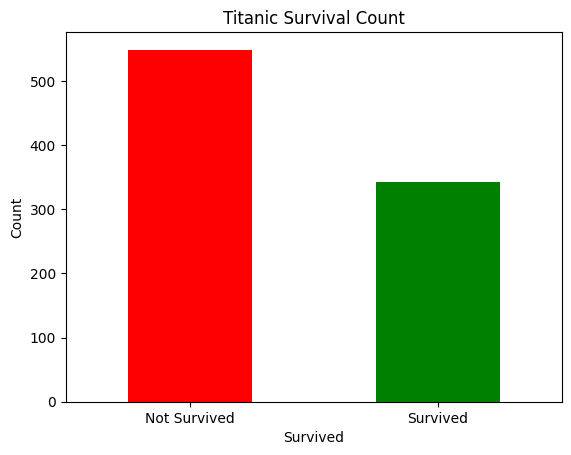

In [19]:
import matplotlib.pyplot as plt

plt.figure()
df['Survived'].value_counts().plot(kind='bar', color=['red','green'])
plt.xticks([0,1], ['Not Survived', 'Survived'], rotation=0)
plt.ylabel("Count")
plt.title("Titanic Survival Count")
plt.savefig("survival_plot.png")

In [15]:
df.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
5,0,3,0,28.0,0,0,8.4583
6,0,1,0,54.0,0,0,51.8625
